# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install folium==0.2.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install "mxnet<2.0.0, >=1.7.0"
!pip3 install torch==1.12.0+cu113 torchvision==0.13.0+cu113 torchtext==0.13.0 --extra-index-url https://download.pytorch.org/whl/cu113
!pip3 install -U setuptools wheel
!pip install autogluon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu113
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# !pip install -U pip
# !pip install -U setuptools wheel
# !pip install -U "mxnet<2.0.0" bokeh==2.0.1
# !pip install autogluon --no-cache-dir
# # Without --no-cache-dir, smaller aws instances may have trouble installing

### Setup Kaggle API Key

In [4]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [5]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "mohamedantargad"
kaggle_key = "22218fe8ff93a3333352e51202af4ea0"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms


In [6]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [7]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [8]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [10]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv')
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [11]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv')
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [12]:
predictor = TabularPredictor(label = 'count',
                             eval_metric = 'root_mean_squared_error').fit(train.drop(columns = ['casual' , 'registered']),
                                                                          time_limit=600,
                                                                          presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20220728_165225/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220728_165225/"
AutoGluon Version:  0.5.1
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator..

### Review AutoGluon's training run with ranking of models that did the best.

In [13]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.068087      19.345073  555.984340                0.000984           0.279735            3       True         14
1   RandomForestMSE_BAG_L2  -53.322553      14.889101  413.922628                0.786783          31.426200            2       True         12
2          LightGBM_BAG_L2  -55.239990      14.431038  405.932893                0.328721          23.436465            2       True         11
3          CatBoost_BAG_L2  -55.774341      14.210343  441.823747                0.108026          59.327319            2       True         13
4        LightGBMXT_BAG_L2  -60.445124      18.120558  441.514620                4.018241          59.018192            2       True         10
5    KNeighborsDist_BAG_L1  -84.125061       0.105591    0.038084         

{'leaderboard':                      model   score_val  pred_time_val    fit_time  \
 0      WeightedEnsemble_L3  -53.068087      19.345073  555.984340   
 1   RandomForestMSE_BAG_L2  -53.322553      14.889101  413.922628   
 2          LightGBM_BAG_L2  -55.239990      14.431038  405.932893   
 3          CatBoost_BAG_L2  -55.774341      14.210343  441.823747   
 4        LightGBMXT_BAG_L2  -60.445124      18.120558  441.514620   
 5    KNeighborsDist_BAG_L1  -84.125061       0.105591    0.038084   
 6      WeightedEnsemble_L2  -84.125061       0.106493    0.550800   
 7    KNeighborsUnif_BAG_L1 -101.546199       0.104698    0.052371   
 8   RandomForestMSE_BAG_L1 -116.544294       0.630549   13.706160   
 9     ExtraTreesMSE_BAG_L1 -124.588053       0.549093    5.949164   
 10         CatBoost_BAG_L1 -130.565015       0.140317  190.268569   
 11         LightGBM_BAG_L1 -131.054162       1.437096   27.223296   
 12       LightGBMXT_BAG_L1 -131.460909      10.656530   86.212215   
 13  

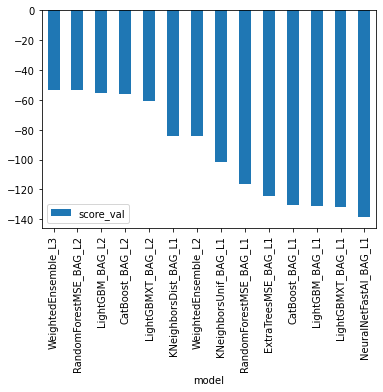

In [14]:
predictor.leaderboard(silent = True).plot(kind = 'bar' , x = 'model' , y='score_val')

In [15]:
predictor.evaluate(train)##we can't evaluate the test as it has no label

Evaluation: root_mean_squared_error on test data: -78.2161472472708
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -78.2161472472708,
    "mean_squared_error": -6117.765690206747,
    "mean_absolute_error": -52.945629420474816,
    "r2": 0.8135412995956132,
    "pearsonr": 0.93823607610101,
    "median_absolute_error": -30.58735179901123
}


{'mean_absolute_error': -52.945629420474816,
 'mean_squared_error': -6117.765690206747,
 'median_absolute_error': -30.58735179901123,
 'pearsonr': 0.93823607610101,
 'r2': 0.8135412995956132,
 'root_mean_squared_error': -78.2161472472708}

### Create predictions from test dataset

In [16]:
predictions = predictor.predict(test)
predictions.head()

0    22.973967
1    41.773163
2    45.084259
3    49.082241
4    51.556355
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [17]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.863594
std        89.834900
min         3.088497
25%        20.290171
50%        64.240601
75%       167.020386
max       363.965057
Name: count, dtype: float64

In [18]:
# How many negative values do we have?
(predictions < 0 ).sum()

0

In [19]:
# Set them to zero
predictions[predictions<0] = 0

### Set predictions to submission dataframe, save, and submit

In [20]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [21]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:01<00:00, 98.9kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [22]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2022-07-28 17:04:14  first raw submission               pending                              
submission_new_hpo.csv       2022-07-28 16:47:09  new features with hyperparameters  complete  0.50155      0.50155       
submission_new_features.csv  2022-07-28 16:21:33  new features                       complete  0.56842      0.56842       
submission.csv               2022-07-28 16:02:29  first raw submission               complete  1.84672      1.84672       


#### Initial score of `1.79`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

In [23]:
print(train.count()[0])
print(test.count()[0])
print(train.columns)
print(test.columns)
print([column for column in train.columns if column not in test.columns]) ##no casual or registered in test

10886
6493
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')
['casual', 'registered', 'count']


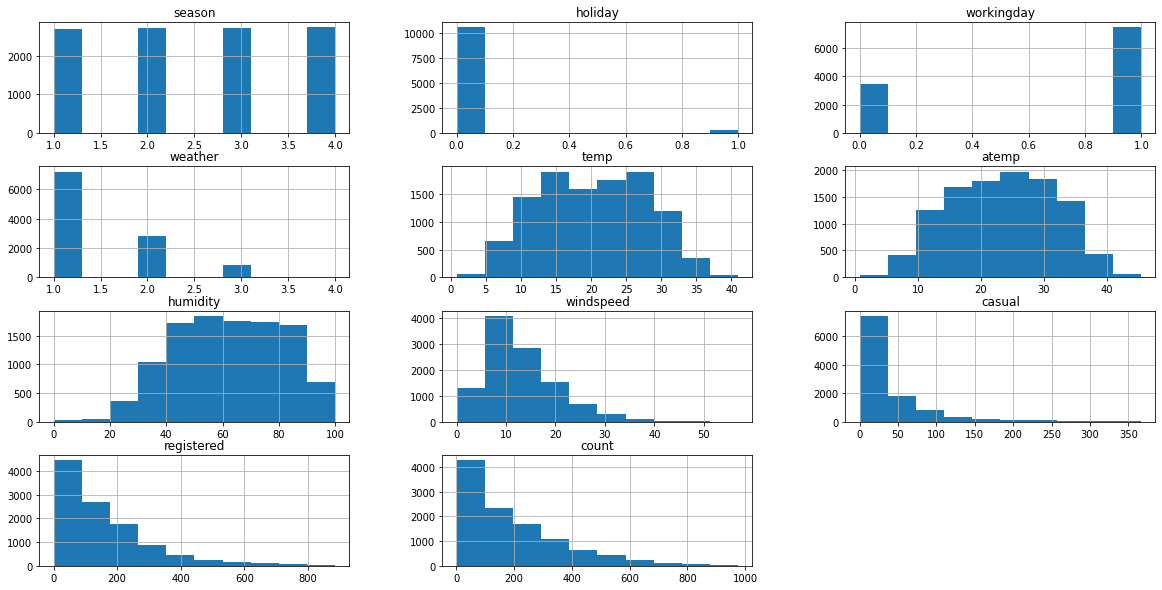

In [24]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
import matplotlib.pyplot as plt
train.hist(figsize=(20,10))
plt.show()

In [25]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [26]:
train['datetime']

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [29]:
# create a new feature
train['datetime'] = pd.to_datetime(train['datetime'],format='%Y-%m-%d %H:%M:%S')
test['datetime'] = pd.to_datetime(test['datetime'],format='%Y-%m-%d %H:%M:%S')

train['hour'] = train.datetime.dt.hour
test['hour'] = test.datetime.dt.hour

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [30]:
train["season"] = train['season'].astype('category')
train["weather"] = train['weather'].astype('category')
test["season"] = test['season'].astype('category')
test["weather"] = test['weather'].astype('category')

In [31]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01 02:00:00,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01 03:00:00,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01 04:00:00,4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff4a7e431d0>,
      dtype=object)

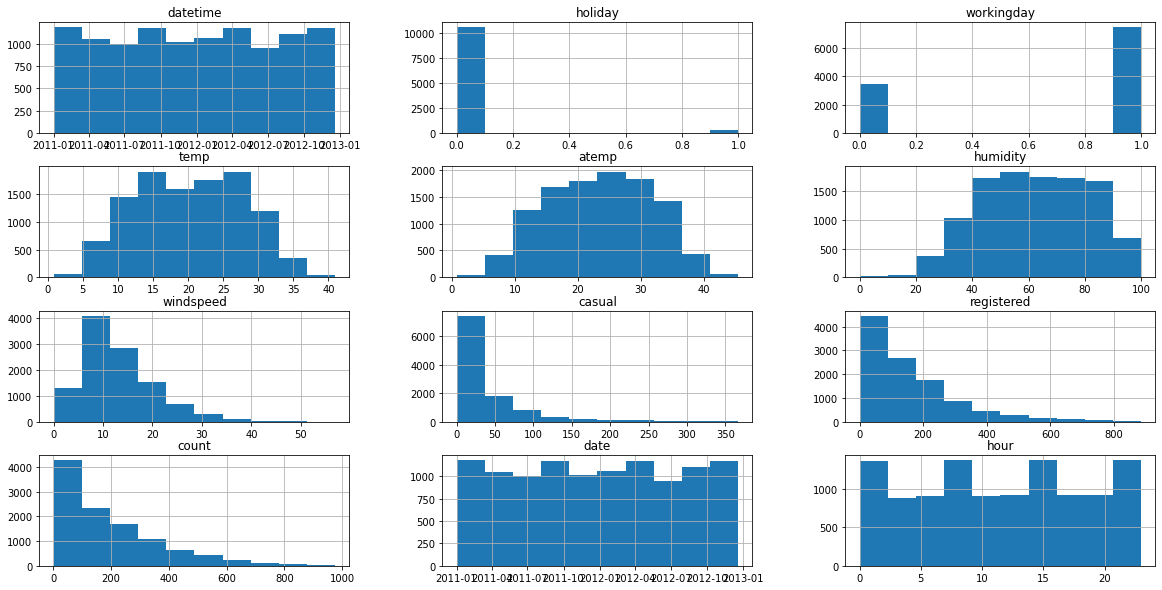

In [32]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(20,10))

## Step 5: Rerun the model with the same settings as before, just with more features

In [ ]:
predictor_new_feature = TabularPredictor(label = 'count',
                             eval_metric = 'root_mean_squared_error').fit(train.drop(columns = ['casual' , 'registered']),
                                                                          time_limit=600,
                                                                          presets='best_quality')

In [ ]:
predictor_new_feature.fit_summary()

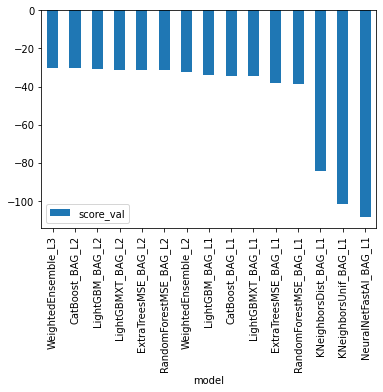

In [45]:
predictor_new_feature.leaderboard(silent =True ).plot(kind = 'bar' , x='model', y='score_val')

In [46]:
# Remember to set all negative values to zero
predictions = predictor_new_feature.predict(test)
print(predictions.head())
print(predictions.describe())
predictions[predictions<0]=0
print('..............................................')
print(predictions.describe())

0    16.794998
1    10.748803
2    10.153332
3     8.740828
4     7.501200
Name: count, dtype: float32
count    6493.000000
mean      152.554779
std       131.894516
min         1.540675
25%        53.469093
50%       117.571190
75%       215.890640
max       806.304565
Name: count, dtype: float64
..............................................
count    6493.000000
mean      152.554779
std       131.894516
min         1.540675
25%        53.469093
50%       117.571190
75%       215.890640
max       806.304565
Name: count, dtype: float64


In [47]:
# Same submitting predictions
submission_new_features = submission.copy()
submission_new_features["count"] = predictions
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [48]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features2"

100% 188k/188k [00:02<00:00, 90.3kB/s]
Successfully submitted to Bike Sharing Demand

In [49]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2022-07-28 17:33:41  new features2                      complete  0.67838      0.67838       
submission.csv               2022-07-28 17:04:14  first raw submission               complete  1.79023      1.79023       
submission_new_hpo.csv       2022-07-28 16:47:09  new features with hyperparameters  complete  0.50155      0.50155       
submission_new_features.csv  2022-07-28 16:21:33  new features                       complete  0.56842      0.56842       


#### New Score of `0.568`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [71]:
predictor_new_hpo = TabularPredictor(label = 'count' , 
                                     eval_metric = 'root_mean_squared_error',
                                     ).fit(train.drop(columns=['registered','casual']),
                                           time_limit = 600,
                                           presets='best_quality',
                                           auto_stack=True,
                                           hyperparameter_tune_kwargs = 'random',
                                           hyperparameters = 'default')



No path specified. Models will be saved in: "AutogluonModels/ag-20220728_183034/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220728_183034/"
AutoGluon Version:  0.5.1
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    10886
Train Data Columns: 10
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator.

[1000]	valid_set's rmse: 35.7814


	Ran out of time, early stopping on iteration 1662. Best iteration is:
	[1662]	valid_set's rmse: 34.2333
	Stopping HPO to satisfy time limit...
Fitted model: LightGBMXT_BAG_L1/T1 ...
	-34.2333	 = Validation score   (-root_mean_squared_error)
	3.71s	 = Training   runtime
	0.25s	 = Validation runtime
Hyperparameter tuning model: LightGBM_BAG_L1 ... Tuning model for up to 4.09s of the 593.78s of remaining time.


[1000]	valid_set's rmse: 33.1807
[2000]	valid_set's rmse: 33.0157


	Ran out of time, early stopping on iteration 2435. Best iteration is:
	[2240]	valid_set's rmse: 32.965
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L1/T1 ...
	-32.965	 = Validation score   (-root_mean_squared_error)
	3.83s	 = Training   runtime
	0.3s	 = Validation runtime
Hyperparameter tuning model: RandomForestMSE_BAG_L1 ... Tuning model for up to 4.09s of the 588.11s of remaining time.
	No hyperparameter search space specified for RandomForestMSE. Skipping HPO. Will train one model based on the provided hyperparameters.
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/autogluon/core/trainer/abstract_trainer.py", line 1385, in _train_single_full
    **model_fit_kwargs
  File "/usr/local/lib/python3.7/dist-packages/autogluon/core/models/abstract/abstract_model.py", line 1001, in hyperparameter_tune
    return self._hyperparameter_tune(hpo_executor=hpo_executor, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/autogluon/cor

In [80]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                   model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    WeightedEnsemble_L2 -32.465830      24.241722  335.207217                0.001445           0.291193            2       True          6
1    WeightedEnsemble_L3 -32.482067      24.927041  448.115592                0.001617           0.407676            3       True         12
2     LightGBM_BAG_L2/T1 -32.733351      24.374983  355.443743                0.134705          20.527720            2       True          8
3     CatBoost_BAG_L2/T1 -32.741522      24.342686  382.093755                0.102408          47.177731            2       True          9
4      XGBoost_BAG_L2/T1 -33.215905      24.447901  358.299769                0.207623          23.383746            2       True         10
5   LightGBMLarge_BAG_L2 -33.274335      24.480688  356.618719                0.240410      

{'leaderboard':                    model  score_val  pred_time_val    fit_time  \
 0    WeightedEnsemble_L2 -32.465830      24.241722  335.207217   
 1    WeightedEnsemble_L3 -32.482067      24.927041  448.115592   
 2     LightGBM_BAG_L2/T1 -32.733351      24.374983  355.443743   
 3     CatBoost_BAG_L2/T1 -32.741522      24.342686  382.093755   
 4      XGBoost_BAG_L2/T1 -33.215905      24.447901  358.299769   
 5   LightGBMLarge_BAG_L2 -33.274335      24.480688  356.618719   
 6   LightGBMLarge_BAG_L1 -33.376992       0.174960    4.659248   
 7   LightGBMXT_BAG_L2/T1 -33.546715      24.514147  356.108511   
 8     LightGBM_BAG_L1/T1 -33.919639       3.037097   40.057735   
 9   LightGBMXT_BAG_L1/T1 -34.562304      20.484849   93.639762   
 10     XGBoost_BAG_L1/T1 -34.666642       0.561485   33.559764   
 11    CatBoost_BAG_L1/T1 -35.407467       0.156847  167.658762   
 
     pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
 0                 0.001445           

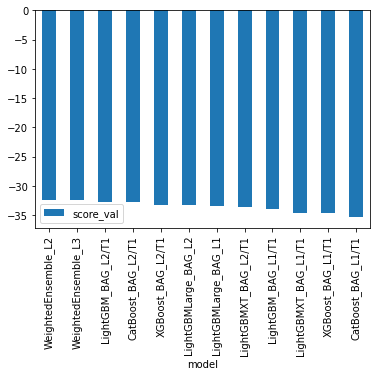

In [73]:
predictor_new_hpo.leaderboard(silent =True ).plot(kind = 'bar' , x='model', y='score_val')

In [74]:
# Remember to set all negative values to zero
predictions_new_hpo = predictor_new_hpo.predict(test)

print(predictions_new_hpo.head())
print(predictions_new_hpo.describe())
predictions_new_hpo[predictions_new_hpo<0]=0
print('..............................................')
print(predictions_new_hpo.describe())

0    14.661972
1     1.772272
2     0.015328
3     1.478671
4     1.551470
Name: count, dtype: float32
count    6493.000000
mean      191.200714
std       173.747360
min       -21.307087
25%        45.911312
50%       150.867554
75%       281.759857
max       904.515015
Name: count, dtype: float64
..............................................
count    6493.000000
mean      191.279648
std       173.658829
min         0.000000
25%        45.911312
50%       150.867554
75%       281.759857
max       904.515015
Name: count, dtype: float64


In [75]:
# Same submitting predictions
submission_new_hpo = submission.copy()
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [76]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters2_no_auto_stack"

100% 187k/187k [00:01<00:00, 97.1kB/s]
Successfully submitted to Bike Sharing Demand

In [77]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                                       status    publicScore  privateScore  
---------------------------  -------------------  ------------------------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2022-07-28 18:41:54  new features with hyperparameters2_no_auto_stack  complete  0.55738      0.55738       
submission_new_hpo.csv       2022-07-28 18:18:46  new features with hyperparameters2_no_auto_stack  complete  0.49484      0.49484       
submission_new_hpo.csv       2022-07-28 17:44:47  new features with hyperparameters2                complete  0.48662      0.48662       
submission_new_features.csv  2022-07-28 17:33:41  new features2                                     complete  0.67838      0.67838       



# ```
#```

#### New Score of `0.48`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

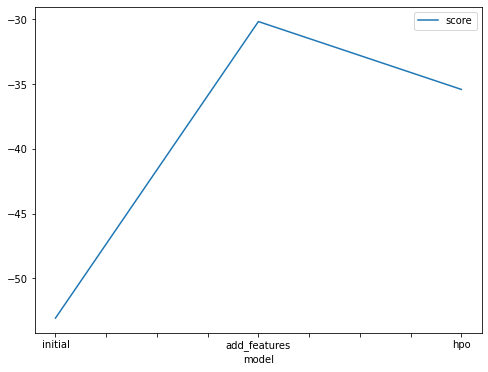

In [82]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-53.068087, -30.166332, -35.407]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

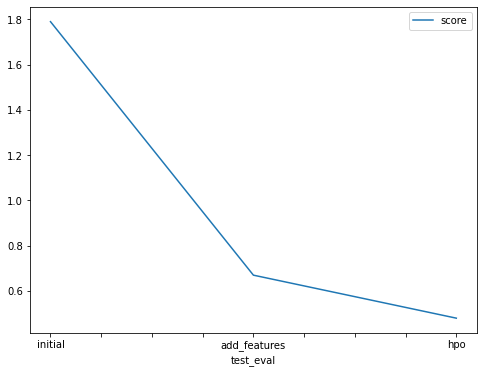

In [59]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.79, 0.67, 0.48]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [84]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "auto_stack": ['default', 'default', 'True'],
    "hyperparameters": ['default', 'default', 'multimodal'],
    "hyperparameters kwargs": ['default', 'default', 'auto'],
    "score": [1.79, 0.56, 0.486]
})

,model,auto_stack,hyperparameters,hyperparameters kwargs,score
0,initial,default,default,default,1.790
1,add_features,default,default,default,0.560
2,hpo,True,multimodal,auto,0.486
